<a href="https://colab.research.google.com/github/shahriariit/COVID-19-Xray/blob/master/COVID19_XRay_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
df1 = pd.read_csv('train2.csv')

print(df1.shape)



FileNotFoundError: ignored

In [0]:
 
x_train= df1.iloc[:, 0:10000].values
y_train = df1.iloc[:, 10000]
print(len(y_train))
print(len(x_train))
 


855
855


In [0]:
#REMOVE constant,quasi constant and duplicate features 
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif
from sklearn.feature_selection import SelectKBest , SelectPercentile


In [0]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(x_train) 
x_train_filter = constant_filter.transform(x_train)
x_train_T = x_train_filter.T

In [0]:
x_train_T = pd.DataFrame(x_train_T)
x_train_T.duplicated().sum()

0

In [0]:
duplicated_features = x_train_T.duplicated()

In [0]:
features_to_keep = [not index for index in duplicated_features]

In [0]:
x_train_unique = x_train_T[features_to_keep].T

In [0]:
x_train_unique.shape

(855, 10000)

In [0]:
###Feature Selection using Mutual Information Gain

In [0]:
mi = mutual_info_classif(x_train,y_train)

In [0]:
len(mi)

10000

In [0]:
mi = pd.Series(mi)
mi.index = x_train_unique.columns

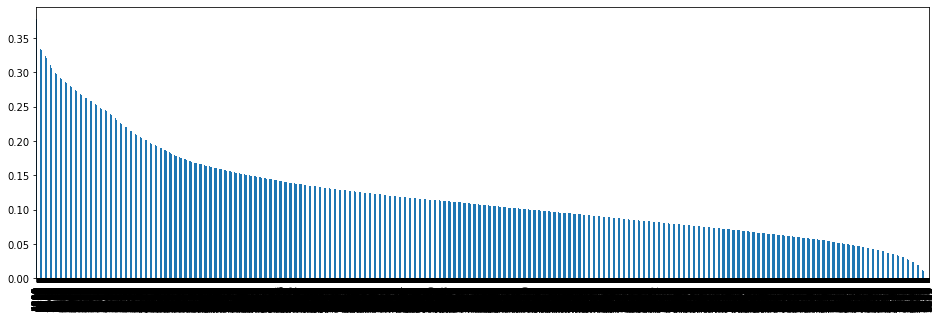

In [0]:
mi.sort_values(ascending=False,inplace = True)
mi.plot.bar(figsize=(16,5))

In [0]:
#percentille selection
sel = SelectPercentile(mutual_info_classif,percentile=10).fit(x_train_unique,y_train)
x  = x_train_unique.columns[sel.get_support()]
 
    

In [0]:
len(x_train_unique.columns[sel.get_support()])

1000

In [0]:
x_train_mi = sel.transform(x_train_unique)
x_train_mi.shape

(855, 1000)

In [0]:
x_train.shape

(855, 10000)

In [0]:
## KBest Selection 
select_feature = SelectKBest(mutual_info_classif,k=5).fit(x_train_unique,y_train)

In [0]:
selected_features_df = pd.DataFrame({'Feature':list(x_train_unique.columns),
                                     'Scores':select_feature.scores_ })
selected_features_df.sort_values(by='Scores',ascending = False) 

In [0]:
selected_features_df.to_csv('feature.csv', index=False, encoding='utf-8')

In [0]:
# Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

In [0]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import geometric_mean_score 
from imblearn.metrics import sensitivity_score 
from imblearn.metrics import specificity_score 
from sklearn.preprocessing import label_binarize 
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import cross_val_predict 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [0]:
#####  SVM  ##############
from sklearn import svm,metrics

classifier = svm.SVC(kernel='linear',gamma=0.001)
y_pred = cross_val_predict(estimator = classifier, X = x_train, y = y_train, cv = 10) 

print('Accuracy :       ', accuracy_score(y_train, y_pred)) 
print('ROC :            ', roc_auc_score(label_binarize(y_train, classes=[0,1,2]), 
                                         label_binarize(y_pred, classes=[0,1,2]), average = 'weighted')) 

print('Precision :      ', precision_score(y_train, y_pred, average='weighted')) 
print('Recall :         ', recall_score(y_train, y_pred, average='weighted')) 
print('F-Measure :      ', f1_score(y_train, y_pred, average = 'weighted')) 
print('Geometric Mean : ', geometric_mean_score(y_train, y_pred, average = 'weighted')) 
print('Sensitivity :    ', sensitivity_score(y_train, y_pred, average = 'weighted')) 
print('Specificity :    ', specificity_score(y_train, y_pred, average = 'weighted')) 
print('Type I Error :   ', (1-geometric_mean_score(y_train, y_pred, average = 'weighted'))) 
print('Type II Error :  ', (1-specificity_score(y_train, y_pred, average = 'weighted')))  


Accuracy :        0.9251461988304094
ROC :             0.9438596491228071
Precision :       0.9266473608117117
Recall :          0.9251461988304094
F-Measure :       0.9255887558941229
Geometric Mean :  0.9436741196092973
Sensitivity :     0.9251461988304094
Specificity :     0.9625730994152046
Type I Error :    0.05632588039070274
Type II Error :   0.037426900584795364


In [0]:
#Gaussian NB
nb = GaussianNB()
y_pred = cross_val_predict(estimator = nb, X = x_train, y = y_train, cv = 10)


print('Accuracy :       ', accuracy_score(y_train, y_pred)) 
print('ROC :            ', roc_auc_score(label_binarize(y_train, classes=[0,1,2]), 
                                         label_binarize(y_pred, classes=[0,1,2]), average = 'weighted'))

print('Precision :      ', precision_score(y_train, y_pred, average='weighted')) 
print('Recall :         ', recall_score(y_train, y_pred, average='weighted')) 
print('F-Measure :      ', f1_score(y_train, y_pred, average = 'weighted'))
print('Geometric Mean : ', geometric_mean_score(y_train, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y_train, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y_train, y_pred, average = 'weighted'))
print('Type I Error :   ', (1-geometric_mean_score(y_train, y_pred, average = 'weighted')))
print('Type II Error :  ', (1-specificity_score(y_train, y_pred, average = 'weighted'))) 

Accuracy :        0.8187134502923976
ROC :             0.8640350877192983
Precision :       0.8164918440494477
Recall :          0.8187134502923976
F-Measure :       0.8155078448086217
Geometric Mean :  0.8628456304525393
Sensitivity :     0.8187134502923976
Specificity :     0.9093567251461988
Type I Error :    0.13715436954746074
Type II Error :   0.09064327485380119


In [0]:
#Bernoulli NB
 
bnb = BernoulliNB(binarize=0.0)

y_pred = cross_val_predict(estimator = bnb, X = x_train, y = y_train, cv = 10)

print('Accuracy :       ', accuracy_score(y_train, y_pred)) 
print('ROC :            ', roc_auc_score(label_binarize(y_train, classes=[0,1,2]), 
                                         label_binarize(y_pred, classes=[0,1,2]), average = 'weighted'))

print('Precision :      ', precision_score(y_train, y_pred, average='weighted')) 
print('Recall :         ', recall_score(y_train, y_pred, average='weighted')) 
print('F-Measure :      ', f1_score(y_train, y_pred, average = 'weighted'))
print('Geometric Mean : ', geometric_mean_score(y_train, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y_train, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y_train, y_pred, average = 'weighted'))
print('Type I Error :   ', (1-geometric_mean_score(y_train, y_pred, average = 'weighted')))
print('Type II Error :  ', (1-specificity_score(y_train, y_pred, average = 'weighted'))) 

Accuracy :        0.791812865497076
ROC :             0.843859649122807
Precision :       0.7936934200073933
Recall :          0.791812865497076
F-Measure :       0.7922200623664525
Geometric Mean :  0.8422530734475733
Sensitivity :     0.791812865497076
Specificity :     0.895906432748538
Type I Error :    0.15774692655242673
Type II Error :   0.10409356725146202


In [0]:
# ---KNN
knn = KNeighborsClassifier()
y_pred = cross_val_predict(estimator = knn, X = x_train, y = y_train, cv = 10)

print('Accuracy :       ', accuracy_score(y_train, y_pred)) 
print('ROC :            ', roc_auc_score(label_binarize(y_train, classes=[0,1,2]), 
                                         label_binarize(y_pred, classes=[0,1,2]), average = 'weighted'))

print('Precision :      ', precision_score(y_train, y_pred, average='weighted')) 
print('Recall :         ', recall_score(y_train, y_pred, average='weighted')) 
print('F-Measure :      ', f1_score(y_train, y_pred, average = 'weighted'))
print('Geometric Mean : ', geometric_mean_score(y_train, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y_train, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y_train, y_pred, average = 'weighted'))
print('Type I Error :   ', (1-geometric_mean_score(y_train, y_pred, average = 'weighted')))
print('Type II Error :  ', (1-specificity_score(y_train, y_pred, average = 'weighted'))) 


Accuracy :        0.8690058479532163
ROC :             0.9017543859649123
Precision :       0.883362601864943
Recall :          0.8690058479532163
F-Measure :       0.8710715630703447
Geometric Mean :  0.9011595340809819
Sensitivity :     0.8690058479532163
Specificity :     0.9345029239766082
Type I Error :    0.09884046591901807
Type II Error :   0.06549707602339183


In [0]:
#--- Decision Tree------
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
y_pred = cross_val_predict(estimator = dt, X = x_train, y = y_train, cv = 10)

print('Accuracy :       ', accuracy_score(y_train, y_pred)) 
print('ROC :            ', roc_auc_score(label_binarize(y_train, classes=[0,1,2]), 
                                         label_binarize(y_pred, classes=[0,1,2]), average = 'weighted'))

print('Precision :      ', precision_score(y_train, y_pred, average='weighted')) 
print('Recall :         ', recall_score(y_train, y_pred, average='weighted')) 
print('F-Measure :      ', f1_score(y_train, y_pred, average = 'weighted'))
print('Geometric Mean : ', geometric_mean_score(y_train, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y_train, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y_train, y_pred, average = 'weighted'))
print('Type I Error :   ', (1-geometric_mean_score(y_train, y_pred, average = 'weighted')))
print('Type II Error :  ', (1-specificity_score(y_train, y_pred, average = 'weighted'))) 

NameError: ignored

In [0]:
#------Logistic Regression ------
logreg = LogisticRegression(solver='liblinear',max_iter=1000)
y_pred = cross_val_predict(estimator = logreg, X = x_train, y = y_train, cv = 10)

print('Accuracy :       ', accuracy_score(y_train, y_pred)) 
print('ROC :            ', roc_auc_score(label_binarize(y_train, classes=[0,1,2]), 
                                         label_binarize(y_pred, classes=[0,1,2]), average = 'weighted'))

print('Precision :      ', precision_score(y_train, y_pred, average='weighted')) 
print('Recall :         ', recall_score(y_train, y_pred, average='weighted')) 
print('F-Measure :      ', f1_score(y_train, y_pred, average = 'weighted'))
print('Geometric Mean : ', geometric_mean_score(y_train, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y_train, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y_train, y_pred, average = 'weighted'))
print('Type I Error :   ', (1-geometric_mean_score(y_train, y_pred, average = 'weighted')))
print('Type II Error :  ', (1-specificity_score(y_train, y_pred, average = 'weighted'))) 


Accuracy :        0.9099415204678363
ROC :             0.9324561403508772
Precision :       0.9106105395931297
Recall :          0.9099415204678363
F-Measure :       0.9101715570834162
Geometric Mean :  0.9321842873432147
Sensitivity :     0.9099415204678363
Specificity :     0.9549707602339181
Type I Error :    0.06781571265678532
Type II Error :   0.04502923976608186


In [0]:
#----Random forest ------
rf = RandomForestClassifier(n_estimators = 100, random_state = 0) 
y_pred = cross_val_predict(estimator = rf, X = x_train, y = y_train, cv = 10)

print('Accuracy :       ', accuracy_score(y_train, y_pred)) 
print('ROC :            ', roc_auc_score(label_binarize(y_train, classes=[0,1,2]), 
                                         label_binarize(y_pred, classes=[0,1,2]), average = 'weighted'))

print('Precision :      ', precision_score(y_train, y_pred, average='weighted')) 
print('Recall :         ', recall_score(y_train, y_pred, average='weighted')) 
print('F-Measure :      ', f1_score(y_train, y_pred, average = 'weighted'))
print('Geometric Mean : ', geometric_mean_score(y_train, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y_train, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y_train, y_pred, average = 'weighted'))
print('Type I Error :   ', (1-geometric_mean_score(y_train, y_pred, average = 'weighted')))
print('Type II Error :  ', (1-specificity_score(y_train, y_pred, average = 'weighted')))  


Accuracy :        0.9076023391812865
ROC :             0.9307017543859649
Precision :       0.9072416701282682
Recall :          0.9076023391812865
F-Measure :       0.9072207287933094
Geometric Mean :  0.9304150539594224
Sensitivity :     0.9076023391812865
Specificity :     0.9538011695906433
Type I Error :    0.06958494604057763
Type II Error :   0.046198830409356684


In [0]:
#---- Gradient Boosting --------
gb_clf = GradientBoostingClassifier(n_estimators=100,  max_features=2, max_depth=2, random_state=0)
y_pred = cross_val_predict(estimator = gb_clf, X = x_train, y = y_train, cv = 10)

print('Accuracy :       ', accuracy_score(y_train, y_pred)) 
print('ROC :            ', roc_auc_score(label_binarize(y_train, classes=[0,1,2]), 
                                         label_binarize(y_pred, classes=[0,1,2]), average = 'weighted'))

print('Precision :      ', precision_score(y_train, y_pred, average='weighted')) 
print('Recall :         ', recall_score(y_train, y_pred, average='weighted')) 
print('F-Measure :      ', f1_score(y_train, y_pred, average = 'weighted'))
print('Geometric Mean : ', geometric_mean_score(y_train, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y_train, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y_train, y_pred, average = 'weighted'))
print('Type I Error :   ', (1-geometric_mean_score(y_train, y_pred, average = 'weighted')))
print('Type II Error :  ', (1-specificity_score(y_train, y_pred, average = 'weighted'))) 


Accuracy :        0.9064327485380117
ROC :             0.9298245614035088
Precision :       0.906647637764572
Recall :          0.9064327485380117
F-Measure :       0.9060984015259826
Geometric Mean :  0.9295302781943647
Sensitivity :     0.9064327485380117
Specificity :     0.9532163742690059
Type I Error :    0.07046972180563527
Type II Error :   0.04678362573099415


In [0]:
#--------XGB----------
xgb = XGBClassifier()
y_pred = cross_val_predict(estimator = xgb, X = x_train, y = y_train, cv = 10)

print('Accuracy :       ', accuracy_score(y_train, y_pred)) 
print('ROC :            ', roc_auc_score(label_binarize(y_train, classes=[0,1,2]), 
                                         label_binarize(y_pred, classes=[0,1,2]), average = 'weighted'))

print('Precision :      ', precision_score(y_train, y_pred, average='weighted')) 
print('Recall :         ', recall_score(y_train, y_pred, average='weighted')) 
print('F-Measure :      ', f1_score(y_train, y_pred, average = 'weighted'))
print('Geometric Mean : ', geometric_mean_score(y_train, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y_train, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y_train, y_pred, average = 'weighted'))
print('Type I Error :   ', (1-geometric_mean_score(y_train, y_pred, average = 'weighted')))
print('Type II Error :  ', (1-specificity_score(y_train, y_pred, average = 'weighted'))) 

Accuracy :        0.927485380116959
ROC :             0.9456140350877194
Precision :       0.9275477925452505
Recall :          0.927485380116959
F-Measure :       0.9274013136463349
Geometric Mean :  0.9454402441317111
Sensitivity :     0.927485380116959
Specificity :     0.9637426900584796
Type I Error :    0.05455975586828887
Type II Error :   0.03625730994152043


In [0]:
#---------mlp--------
mlp = MLPClassifier(solver='adam', alpha=1e-5, random_state=1,)
y_pred = cross_val_predict(estimator = mlp, X = x_train, y = y_train, cv = 10)

print('Accuracy :       ', accuracy_score(y_train, y_pred)) 
print('ROC :            ', roc_auc_score(label_binarize(y_train, classes=[0,1,2]), 
                                         label_binarize(y_pred, classes=[0,1,2]), average = 'weighted'))

print('Precision :      ', precision_score(y_train, y_pred, average='weighted')) 
print('Recall :         ', recall_score(y_train, y_pred, average='weighted')) 
print('F-Measure :      ', f1_score(y_train, y_pred, average = 'weighted'))
print('Geometric Mean : ', geometric_mean_score(y_train, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y_train, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y_train, y_pred, average = 'weighted'))
print('Type I Error :   ', (1-geometric_mean_score(y_train, y_pred, average = 'weighted')))
print('Type II Error :  ', (1-specificity_score(y_train, y_pred, average = 'weighted'))) 

Accuracy :        0.935672514619883
ROC :             0.9517543859649122
Precision :       0.936247510519498
Recall :          0.935672514619883
F-Measure :       0.935841627202374
Geometric Mean :  0.9516185079208417
Sensitivity :     0.935672514619883
Specificity :     0.9678362573099415
Type I Error :    0.04838149207915832
Type II Error :   0.032163742690058506


In [0]:
#nearest centroid 
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid(metric= 'manhattan')
y_pred = cross_val_predict(estimator = clf, X = x_train, y = y_train, cv = 10)

print('Accuracy :       ', accuracy_score(y_train, y_pred)) 
print('ROC :            ', roc_auc_score(label_binarize(y_train, classes=[0,1,2]), 
                                         label_binarize(y_pred, classes=[0,1,2]), average = 'weighted'))

print('Precision :      ', precision_score(y_train, y_pred, average='weighted')) 
print('Recall :         ', recall_score(y_train, y_pred, average='weighted')) 
print('F-Measure :      ', f1_score(y_train, y_pred, average = 'weighted'))
print('Geometric Mean : ', geometric_mean_score(y_train, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y_train, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y_train, y_pred, average = 'weighted'))
print('Type I Error :   ', (1-geometric_mean_score(y_train, y_pred, average = 'weighted')))
print('Type II Error :  ', (1-specificity_score(y_train, y_pred, average = 'weighted'))) 

Accuracy :        0.7988304093567251
ROC :             0.849122807017544
Precision :       0.8107852306475709
Recall :          0.7988304093567251
F-Measure :       0.8009060831641477
Geometric Mean :  0.8476321231140778
Sensitivity :     0.7988304093567251
Specificity :     0.8994152046783626
Type I Error :    0.15236787688592224
Type II Error :   0.10058479532163744


In [0]:
#------------SGD -----------
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter = 1000)
y_pred = cross_val_predict(estimator = clf, X = x_train, y = y_train, cv = 10)

print('Accuracy :       ', accuracy_score(y_train, y_pred)) 
print('ROC :            ', roc_auc_score(label_binarize(y_train, classes=[0,1,2]), 
                                         label_binarize(y_pred, classes=[0,1,2]), average = 'weighted'))

print('Precision :      ', precision_score(y_train, y_pred, average='weighted')) 
print('Recall :         ', recall_score(y_train, y_pred, average='weighted')) 
print('F-Measure :      ', f1_score(y_train, y_pred, average = 'weighted'))
print('Geometric Mean : ', geometric_mean_score(y_train, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y_train, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y_train, y_pred, average = 'weighted'))
print('Type I Error :   ', (1-geometric_mean_score(y_train, y_pred, average = 'weighted')))
print('Type II Error :  ', (1-specificity_score(y_train, y_pred, average = 'weighted'))) 

In [0]:
#-----------perceptron--------
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
y_pred = cross_val_predict(estimator = clf, X = x_train, y = y_train, cv = 10)

print('Accuracy :       ', accuracy_score(y_train, y_pred)) 
print('ROC :            ', roc_auc_score(label_binarize(y_train, classes=[0,1,2]), 
                                         label_binarize(y_pred, classes=[0,1,2]), average = 'weighted'))

print('Precision :      ', precision_score(y_train, y_pred, average='weighted')) 
print('Recall :         ', recall_score(y_train, y_pred, average='weighted')) 
print('F-Measure :      ', f1_score(y_train, y_pred, average = 'weighted'))
print('Geometric Mean : ', geometric_mean_score(y_train, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y_train, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y_train, y_pred, average = 'weighted'))
print('Type I Error :   ', (1-geometric_mean_score(y_train, y_pred, average = 'weighted')))
print('Type II Error :  ', (1-specificity_score(y_train, y_pred, average = 'weighted'))) 


Accuracy :        0.9076023391812865
ROC :             0.9307017543859649
Precision :       0.909453653624845
Recall :          0.9076023391812865
F-Measure :       0.9080766295689328
Geometric Mean :  0.9304150539594224
Sensitivity :     0.9076023391812865
Specificity :     0.9538011695906433
Type I Error :    0.06958494604057763
Type II Error :   0.046198830409356684


In [0]:
import numpy as np
np.random.randint(1,1000, 1)[0]

727